In [1]:
#for server hpcr
import sys
sys.path.append("/home/jum002/store5/repo/smrt_fork/smrt")

import os
os.chdir("/home/jum002/code-workshop/res_paper")

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binned_statistic
import seaborn as sns


#local radar_equivalent_function
import res_function as iso

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
#sapporo
xr_sap = xr.open_dataset('~/store5/output/res_output/sap_season_2013.nc')
df_sap = xr_sap.to_dataframe().dropna()
#weisflu
xr_cdp = xr.open_dataset('~/store5/output/res_output/wfj_season_2013.nc')
df_cdp = xr_cdp.to_dataframe().dropna()
#trail valley crek
xr_tvc = xr.open_dataset('~/store5/output/res_output/tvc_season_2013.nc')
df_tvc = xr_tvc.to_dataframe().dropna()

#get list of date
dates_sap = df_sap.groupby(level = 'time').mean().index.get_level_values(0)
dates_cdp = df_cdp.groupby(level = 'time').mean().index.get_level_values(0)
dates_tvc = df_tvc.groupby(level = 'time').mean().index.get_level_values(0)

In [4]:
xr_sap

<xarray.Dataset>
Dimensions:     (time: 471, snow_layer: 50)
Coordinates:
  * time        (time) datetime64[ns] 2013-12-11T18:00:00 ... 2014-04-08T06:0...
  * snow_layer  (snow_layer) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49
Data variables:
    SNODEN_ML   (time, snow_layer) float64 188.4 189.0 142.8 ... nan nan nan
    SNOMA_ML    (time, snow_layer) float64 2.369 2.37 1.528 ... nan nan nan
    TSNOW_ML    (time, snow_layer) float64 271.0 271.1 271.2 ... nan nan nan
    SNODOPT_ML  (time, snow_layer) float64 0.0002365 0.000237 ... nan nan
    SNODP       (time, snow_layer) float64 0.1056 0.1056 0.1056 ... nan nan nan
    WSNO        (time, snow_layer) float64 4.669 4.669 4.669 ... nan nan nan
    TSNO_SURF   (time, snow_layer) float64 271.0 271.0 271.0 ... nan nan nan
    SNOWRATE    (time, snow_layer) float64 1.318e-06 1.318e-06 ... nan nan
    RAINRATE    (time, snow_layer) float64 2.195e-10 2.195e-10 ... nan nan
    thickness   (time, snow_layer) float64 0.01258 0.01254 0.0107 ... nan nan
    ssa         (time, snow_layer) float64 27.66 27.61 52.25 ... nan nan nan
    height      (time, snow_layer) float64 0.1056 0.09299 0.08045 ... nan nan

# Grouping and averaging simulations

In [5]:
cdp_sig_n, cdp_swe_n, cdp_param = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'n', model = 'iba_inv')
cdp_sig_1, cdp_swe_1 = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'one', model = 'iba_inv')
cdp_sig_2, cdp_swe_2 = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'two', model = 'iba_inv')
cdp_sig_2k, cdp_swe_2k = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'two_k', model = 'iba_inv')
cdp_sig_3, cdp_swe_3 = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'three', model = 'iba_inv')
cdp_sig_3k, cdp_swe_3k = iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'three_k', model = 'iba_inv')
cdp_sig_3k_ke, cdp_swe_3k_ke = iso.get_sig_swe(df_cdp, dates_cdp, 'thick-ke', 'three_k', model = 'iba_inv')
cdp_sig_3k_ked, cdp_swe_3k_ked = iso.get_sig_swe(df_cdp, dates_cdp, 'thick-ke-density', 'three_k', model = 'iba_inv')

In [6]:
sap_sig_n, sap_swe_n, sap_param = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'n', model = 'iba_inv')
sap_sig_1, sap_swe_1 = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'one', model = 'iba_inv')
sap_sig_2, sap_swe_2 = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'two', model = 'iba_inv')
sap_sig_2k, sap_swe_2k = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'two_k', model = 'iba_inv')
sap_sig_3, sap_swe_3 = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'three', model = 'iba_inv')
sap_sig_3k, sap_swe_3k = iso.get_sig_swe(df_sap, dates_sap, 'thick', 'three_k', model = 'iba_inv')
sap_sig_3k_ke, sap_swe_3k_ke = iso.get_sig_swe(df_sap, dates_sap, 'thick-ke', 'three_k', model = 'iba_inv')
sap_sig_3k_ked, sap_swe_3k_ked = iso.get_sig_swe(df_sap, dates_sap, 'thick-ke-density', 'three_k', model = 'iba_inv')

In [7]:
tvc_sig_n, tvc_swe_n, tvc_param = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'n', model = 'iba_inv')
tvc_sig_1, tvc_swe_1 = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'one', model = 'iba_inv')
tvc_sig_2, tvc_swe_2 = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'two', model = 'iba_inv')
tvc_sig_2k, tvc_swe_2k = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'two_k', model = 'iba_inv')
tvc_sig_3, tvc_swe_3 = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'three', model = 'iba_inv')
tvc_sig_3k, tvc_swe_3k = iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'three_k', model = 'iba_inv')
tvc_sig_3k_ke, tvc_swe_3k_ke = iso.get_sig_swe(df_tvc, dates_tvc, 'thick-ke', 'three_k', model = 'iba_inv')
tvc_sig_3k_ked, tvc_swe_3k_ked = iso.get_sig_swe(df_tvc, dates_tvc, 'thick-ke-density', 'three_k', model = 'iba_inv')

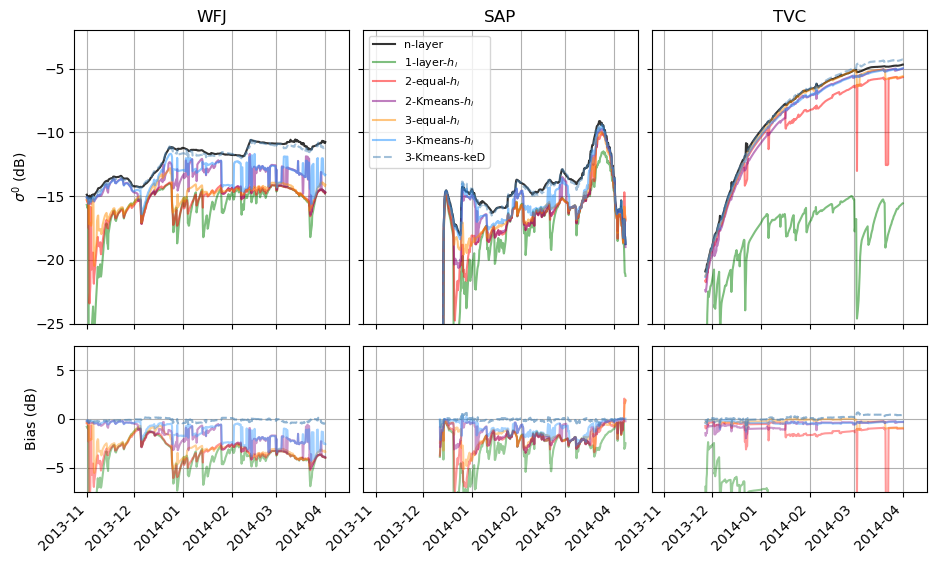

In [8]:
fig, ax = plt.subplots(2,3, figsize = (11,6), sharex = True, sharey = 'row', gridspec_kw={'height_ratios': [2, 1,]})

#row 1
ax[0,0].plot(dates_cdp, cdp_sig_n, alpha = 0.8, label = 'n-layer', color = 'k')
ax[0,0].plot(dates_cdp, cdp_sig_1, alpha = 0.5, label = '1-layer', color = 'green')
ax[0,0].plot(dates_cdp, cdp_sig_2, alpha = 0.5, label = '2-layer', color = 'red')
ax[0,0].plot(dates_cdp, cdp_sig_2k, alpha = 0.5, label = '2k-layer', color = 'purple')
ax[0,0].plot(dates_cdp, cdp_sig_3, alpha = 0.5, label = '3-layer', color = 'darkorange')
ax[0,0].plot(dates_cdp, cdp_sig_3k, alpha = 0.5, label = '3k-layer', color = 'dodgerblue')
#ax[0,0].plot(dates_cdp, cdp_sig_3k_ke, alpha = 0.5, label = '3k-ke-layer', color = 'steelblue', linestyle= ':')
ax[0,0].plot(dates_cdp, cdp_sig_3k_ked, alpha = 0.5, label = '3k-keD-layer', color = 'steelblue', linestyle= '--')
ax[0,0].grid()


ax[0,1].plot(dates_sap, sap_sig_n, alpha = 0.8, label = 'n-layer', color = 'k')
ax[0,1].plot(dates_sap, sap_sig_1, alpha = 0.5, label = '1-layer-$h_i$', color = 'green')
ax[0,1].plot(dates_sap, sap_sig_2, alpha = 0.5, label = '2-equal-$h_i$', color = 'red')
ax[0,1].plot(dates_sap, sap_sig_2k, alpha = 0.5, label = '2-Kmeans-$h_i$', color = 'purple')
ax[0,1].plot(dates_sap, sap_sig_3, alpha = 0.5, label = '3-equal-$h_i$', color = 'darkorange')
ax[0,1].plot(dates_sap, sap_sig_3k, alpha = 0.5, label = '3-Kmeans-$h_i$', color = 'dodgerblue')
#ax[0,1].plot(dates_sap, sap_sig_3k_ke, alpha = 0.5, label = '3-Kmeans-ke', color = 'steelblue', linestyle= ':')
ax[0,1].plot(dates_sap, sap_sig_3k_ked, alpha = 0.5, label = '3-Kmeans-keD', color = 'steelblue', linestyle= '--')
ax[0,1].grid()

# tvc
ax[0,2].plot(dates_tvc, tvc_sig_n, alpha = 0.8, label = 'n-layer', color = 'k')
ax[0,2].plot(dates_tvc, tvc_sig_1, alpha = 0.5, label = '1-layer', color = 'green')
ax[0,2].plot(dates_tvc, tvc_sig_2, alpha = 0.5, label = '2-equal', color = 'red')
ax[0,2].plot(dates_tvc, tvc_sig_2k, alpha = 0.5, label = '2-Kmeans', color = 'purple')
ax[0,2].plot(dates_tvc, tvc_sig_3, alpha = 0.5, label = '3-equal', color = 'darkorange')
ax[0,2].plot(dates_tvc, tvc_sig_3k, alpha = 0.5, label = '3-Kmeans', color = 'dodgerblue')
#ax[0,2].plot(dates_tvc, tvc_sig_3k_ke, alpha = 0.5, label = '3-Kmeans-ke', color = 'steelblue', linestyle= ':')
ax[0,2].plot(dates_tvc, tvc_sig_3k_ked, alpha = 0.5, label = '3-Kmeans-keD', color = 'steelblue', linestyle= '--')
ax[0,2].grid()

#row 2
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_1, cdp_sig_n), alpha = 0.4, color = 'green')
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_2, cdp_sig_n), alpha = 0.4, color = 'red')
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_3, cdp_sig_n), alpha = 0.4, color = 'darkorange')
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_2k, cdp_sig_n), alpha = 0.4, color = 'purple')
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_3k, cdp_sig_n), alpha = 0.4, color = 'dodgerblue')
#ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_3k_ke, cdp_sig_n), alpha = 0.6, color = 'steelblue', linestyle= ':')
ax[1,0].plot(dates_cdp, iso.bias(cdp_sig_3k_ked, cdp_sig_n), alpha = 0.6, color = 'steelblue', linestyle= '--')
ax[1,0].grid()

#sap
ax[1,1].plot(dates_sap, iso.bias(sap_sig_1, sap_sig_n), alpha = 0.4, color = 'green')
ax[1,1].plot(dates_sap, iso.bias(sap_sig_2, sap_sig_n), alpha = 0.4, color = 'red')
ax[1,1].plot(dates_sap, iso.bias(sap_sig_3, sap_sig_n), alpha = 0.4, color = 'darkorange')
ax[1,1].plot(dates_sap, iso.bias(sap_sig_2k, sap_sig_n), alpha = 0.4, color = 'purple')
ax[1,1].plot(dates_sap, iso.bias(sap_sig_3k, sap_sig_n), alpha = 0.4, color = 'dodgerblue')
#ax[1,1].plot(dates_sap, iso.bias(sap_sig_3k_ke, sap_sig_n), alpha = 0.6, color = 'steelblue', linestyle= ':')
ax[1,1].plot(dates_sap, iso.bias(sap_sig_3k_ked, sap_sig_n), alpha = 0.6, color = 'steelblue', linestyle= '--')
ax[1,1].grid()

#tvc
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_1, tvc_sig_n), alpha = 0.4, color = 'green', label = '1-layer')
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_2, tvc_sig_n), alpha = 0.4, color = 'red', label = '2-equal')
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_3, tvc_sig_n), alpha = 0.4, color = 'darkorange', label = '3-equal')
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_2k, tvc_sig_n), alpha = 0.4, color = 'purple', label = '2-Kmeans')
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_3k, tvc_sig_n), alpha = 0.4, color = 'dodgerblue', label = '3-Kmeans')
#ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_3k_ke, tvc_sig_n), alpha = 0.6, color = 'steelblue', linestyle= ':', label = '3-Kmeans-ke')
ax[1,2].plot(dates_tvc, iso.bias(tvc_sig_3k_ked, tvc_sig_n), alpha = 0.6, color = 'steelblue', linestyle= '--', label = '3-Kmeans-keD')
ax[1,2].grid()

# #row3
# #SWE
# ax[2,0].plot(dates_cdp, iso.bias(cdp_swe_3k_ke, cdp_swe_n), alpha = 0.8, color = 'steelblue', linestyle= ':')
# ax[2,0].plot(dates_cdp, iso.bias(cdp_swe_3k_ked, cdp_swe_n), alpha = 0.8, color = 'steelblue', linestyle= '--')

# ax[2,1].plot(dates_sap, iso.bias(sap_swe_3k_ke, sap_swe_n), alpha = 0.8, color = 'steelblue', linestyle= ':')
# ax[2,1].plot(dates_sap, iso.bias(sap_swe_3k_ked, sap_swe_n), alpha = 0.8, color = 'steelblue', linestyle= '--')

# ax[2,2].plot(dates_tvc, iso.bias(tvc_swe_3k_ke, tvc_swe_n), alpha = 0.8, color = 'steelblue', linestyle= ':')
# ax[2,2].plot(dates_tvc, iso.bias(tvc_swe_3k_ked, tvc_swe_n), alpha = 0.8, color = 'steelblue', linestyle= '--')
# ax[2,0].grid()
# ax[2,1].grid()
# ax[2,2].grid()

#dates
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45, ha='right')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45, ha='right')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=45, ha='right')


ax[0,0].set_ylabel('$\sigma^0$ (dB)')
ax[1,0].set_ylabel('Bias (dB)')
#ax[2,0].set_ylabel('iso.Bias SWE (mm)')
ax[0,0].set_title('WFJ')
ax[0,1].set_title('SAP')
ax[0,2].set_title('TVC')

ax[0,0].set_ylim(-25, -2)
ax[1,0].set_ylim(-7.5, 7.5)
ax[0,1].legend( fontsize = 8)
#ax[1,2].legend( bbox_to_anchor=(1, 1, 0.1, 0.1))
plt.subplots_adjust(hspace = 0.1)
plt.subplots_adjust(wspace = 0.05)

## bias and snow properties

In [9]:
bins_d = np.linspace(100,500,9)
bins_s = np.linspace(5,45,9)
bins_t = np.linspace(258,274,9) - 273.2

In [16]:
#density
bin_means = binned_statistic(cdp_param['mean_rho'], cdp_param['mean_rho'], bins =bins_d )
df_rho_cdp = pd.DataFrame({'rho' : cdp_param['mean_rho'], 'Bias (K)' : iso.bias(cdp_sig_3, cdp_sig_n), 'group' : bin_means[2]})
df_rho_cdp['Density'] = df_rho_cdp.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
bin_means = binned_statistic(cdp_param['mean_rho'], cdp_param['mean_rho'], bins =bins_d )
df_rho_cdp_3k = pd.DataFrame({'rho' : cdp_param['mean_rho'], 'Bias (K)' : iso.bias(cdp_sig_3k, cdp_sig_n), 'group' : bin_means[2]})
df_rho_cdp_3k['Density'] = df_rho_cdp_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )


bin_means = binned_statistic(sap_param['mean_rho'], sap_param['mean_rho'], bins =bins_d)
df_rho_sap = pd.DataFrame({'rho' : sap_param['mean_rho'], 'Bias (K)' : iso.bias(sap_sig_3, sap_sig_n), 'group' : bin_means[2]})
df_rho_sap['Density'] = df_rho_sap.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_rho_sap_3k = pd.DataFrame({'rho' : sap_param['mean_rho'], 'Bias (K)' : iso.bias(sap_sig_3k, sap_sig_n), 'group' : bin_means[2]})
df_rho_sap_3k['Density'] = df_rho_sap_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

bin_means = binned_statistic(tvc_param['mean_rho'], tvc_param['mean_rho'], bins = bins_d)
df_rho_tvc = pd.DataFrame({'rho' : tvc_param['mean_rho'], 'Bias (K)' : iso.bias(tvc_sig_3, tvc_sig_n), 'group' : bin_means[2]})
df_rho_tvc['Density'] = df_rho_tvc.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_rho_tvc_3k = pd.DataFrame({'rho' : tvc_param['mean_rho'], 'Bias (K)' : iso.bias(tvc_sig_3k, tvc_sig_n), 'group' : bin_means[2]})
df_rho_tvc_3k['Density'] = df_rho_tvc_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

#ssa
bin_means = binned_statistic(cdp_param['mean_ssa'], cdp_param['mean_ssa'], bins =bins_s)
df_ssa_cdp = pd.DataFrame({'ssa' : cdp_param['mean_ssa'], 'Bias (K)' : iso.bias(cdp_sig_3, cdp_sig_n), 'group' : bin_means[2]})
df_ssa_cdp['SSA'] = df_ssa_cdp.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_ssa_cdp_3k = pd.DataFrame({'ssa' : cdp_param['mean_ssa'], 'Bias (K)' : iso.bias(cdp_sig_3k, cdp_sig_n), 'group' : bin_means[2]})
df_ssa_cdp_3k['SSA'] = df_ssa_cdp_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )


bin_means = binned_statistic(sap_param['mean_ssa'], sap_param['mean_ssa'], bins =bins_s)
df_ssa_sap = pd.DataFrame({'ssa' : sap_param['mean_ssa'], 'Bias (K)' : iso.bias(sap_sig_3, sap_sig_n), 'group' : bin_means[2]})
df_ssa_sap['SSA'] = df_ssa_sap.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_ssa_sap_3k = pd.DataFrame({'ssa' : sap_param['mean_ssa'], 'Bias (K)' : iso.bias(sap_sig_3k, sap_sig_n), 'group' : bin_means[2]})
df_ssa_sap_3k['SSA'] = df_ssa_sap_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

bin_means = binned_statistic(tvc_param['mean_ssa'], tvc_param['mean_ssa'], bins =bins_s)
df_ssa_tvc = pd.DataFrame({'ssa' : tvc_param['mean_ssa'], 'Bias (K)' : iso.bias(tvc_sig_3, tvc_sig_n), 'group' : bin_means[2]})
df_ssa_tvc['SSA'] = df_ssa_tvc.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_ssa_tvc_3k = pd.DataFrame({'ssa' : tvc_param['mean_ssa'], 'Bias (K)' : iso.bias(tvc_sig_3k, tvc_sig_n), 'group' : bin_means[2]})
df_ssa_tvc_3k['SSA'] = df_ssa_tvc_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

#temp
bin_means = binned_statistic(np.array(cdp_param['mean_temp']) - 273.2, np.array(cdp_param['mean_temp']) - 273.2, bins =bins_t)
df_temp_cdp = pd.DataFrame({'temp' : np.array(cdp_param['mean_temp']) - 273.2, 'Bias (K)' : iso.bias(cdp_sig_3, cdp_sig_n), 'group' : bin_means[2]})
df_temp_cdp['Temperature (K)'] = df_temp_cdp.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_temp_cdp_3k = pd.DataFrame({'temp' : np.array(cdp_param['mean_temp']) - 273.2, 'Bias (K)' : iso.bias(cdp_sig_3k, cdp_sig_n), 'group' : bin_means[2]})
df_temp_cdp_3k['Temperature (K)'] = df_temp_cdp_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )


bin_means = binned_statistic(np.array(sap_param['mean_temp']) -273.2, np.array(sap_param['mean_temp']) -273.2, bins =bins_t)
df_temp_sap = pd.DataFrame({'temp' : np.array(sap_param['mean_temp']) -273.2, 'Bias (K)' : iso.bias(sap_sig_3, sap_sig_n), 'group' : bin_means[2]})
df_temp_sap['Temperature (K)'] = df_temp_sap.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )
df_temp_sap_3k = pd.DataFrame({'temp' : np.array(sap_param['mean_temp']) -273.2, 'Bias (K)' : iso.bias(sap_sig_3k, sap_sig_n), 'group' : bin_means[2]})
df_temp_sap_3k['Temperature (K)'] = df_temp_sap_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

bin_means = binned_statistic(np.array(tvc_param['mean_temp'])-273.2, np.array(tvc_param['mean_temp'])-273.2, bins =bins_t)
df_temp_tvc = pd.DataFrame({'temp' : np.array(tvc_param['mean_temp'])-273.2, 'Bias (K)' : iso.bias(tvc_sig_3, tvc_sig_n), 'group' : bin_means[2]})
df_temp_tvc['Temperature (K)'] = df_temp_tvc.apply(lambda x: int(bin_means[1][int(x.group)]), axis =1 )
df_temp_tvc_3k = pd.DataFrame({'temp' : np.array(tvc_param['mean_temp'])-273.2, 'Bias (K)' : iso.bias(tvc_sig_3k, tvc_sig_n), 'group' : bin_means[2]})
df_temp_tvc_3k['Temperature (K)'] = df_temp_tvc_3k.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

# #wet
# wet_ratio = np.array(cdp_param['wet'])/np.array(cdp_swe_n)
# bin_means = binned_statistic(wet_ratio, wet_ratio, bins =10)
# df_wet_cdp = pd.DataFrame({'wet' : wet_ratio, 'Bias (K)' : iso.bias(cdp_sig_3, cdp_sig_n), 'group' : bin_means[2]})
# df_wet_cdp['LWC (%)'] = df_wet_cdp.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )

# wet_ratio = np.array(sap_param['wet'])/np.array(sap_swe_n)
# bin_means = binned_statistic(wet_ratio, wet_ratio, bins =10)
# df_wet_sap = pd.DataFrame({'wet' : wet_ratio, 'Bias (K)' : iso.bias(sap_sig_3, sap_sig_n), 'group' : bin_means[2]})
# df_wet_sap['LWC (%)'] = df_wet_sap.apply(lambda x: int(bin_means[1][int(x.group)]) , axis =1 )


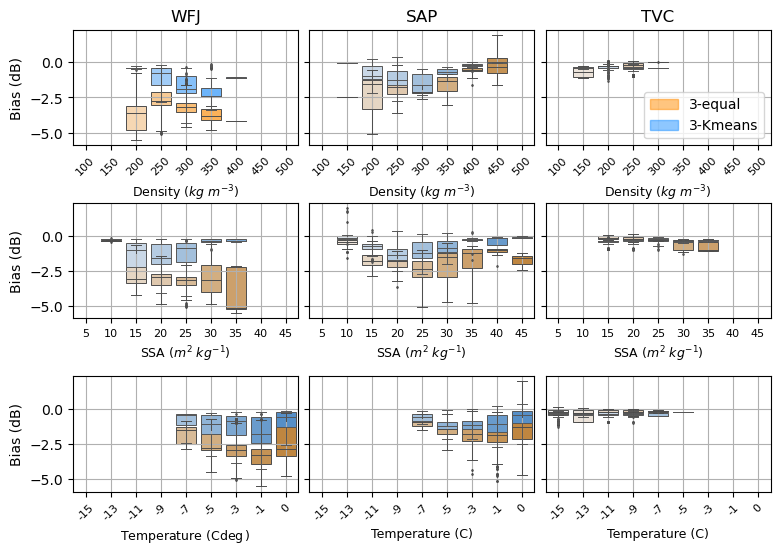

In [17]:
fig, ax = plt.subplots(3,3, figsize = (9,6), sharey = True)

sns.boxplot(x= df_rho_cdp['Density'], y= df_rho_cdp['Bias (K)'], saturation = 1, fliersize = 1, whis = 2 , 
            ax = ax[0,0], palette = "light:darkorange", order=[int(d) for d in bins_d], linewidth =0.7)
sns.boxplot(x= df_rho_cdp_3k['Density'], y= df_rho_cdp_3k['Bias (K)'], saturation = 1, fliersize = 1, whis = 2 , 
            ax = ax[0,0], palette = "light:dodgerblue", order=[int(d) for d in bins_d], linewidth =0.7)

sns.boxplot(x= df_rho_sap['Density'], y= df_rho_sap['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[0,1], palette = "light:darkorange", order=[int(d) for d in bins_d], linewidth =0.7)
sns.boxplot(x= df_rho_sap_3k['Density'], y= df_rho_sap_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[0,1], palette = "light:dodgerblue", order=[int(d) for d in bins_d], linewidth =0.7)

sns.boxplot(x= df_rho_tvc['Density'], y= df_rho_tvc['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[0,2], palette = "light:darkorange", order=[int(d) for d in bins_d], linewidth =0.7)
sns.boxplot(x= df_rho_tvc_3k['Density'], y= df_rho_tvc_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[0,2], palette = "light:dodgerblue", order=[int(d) for d in bins_d], linewidth =0.7)


sns.boxplot(x= df_ssa_cdp['SSA'], y= df_ssa_cdp['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,0], palette = "light:darkorange", order=[int(s) for s in bins_s], linewidth =0.7)
sns.boxplot(x= df_ssa_cdp_3k['SSA'], y= df_ssa_cdp_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,0], palette = "light:dodgerblue", order=[int(s) for s in bins_s], linewidth =0.7)

sns.boxplot(x= df_ssa_sap['SSA'], y= df_ssa_sap['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,1], palette = "light:darkorange", order=[int(s) for s in bins_s], linewidth =0.7)
sns.boxplot(x= df_ssa_sap_3k['SSA'], y= df_ssa_sap_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,1], palette = "light:dodgerblue", order=[int(s) for s in bins_s], linewidth =0.7)

sns.boxplot(x= df_ssa_tvc['SSA'], y= df_ssa_tvc['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,2], palette = "light:darkorange", order=[int(s) for s in bins_s], linewidth =0.7)
sns.boxplot(x= df_ssa_tvc_3k['SSA'], y= df_ssa_tvc_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 , 
            ax = ax[1,2], palette = "light:dodgerblue", order=[int(s) for s in bins_s], linewidth =0.7)


sns.boxplot(x= df_temp_cdp['Temperature (K)'], y= df_temp_cdp['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,0], palette = "light:darkorange", order = [int(t) for t in bins_t], linewidth =0.7)
sns.boxplot(x= df_temp_cdp_3k['Temperature (K)'], y= df_temp_cdp_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,0], palette = "light:dodgerblue", order = [int(t) for t in bins_t], linewidth =0.7)

sns.boxplot(x= df_temp_sap['Temperature (K)'], y= df_temp_sap['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,1], palette = "light:darkorange", order = [int(t) for t in bins_t], linewidth =0.7)
sns.boxplot(x= df_temp_sap_3k['Temperature (K)'], y= df_temp_sap_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,1], palette = "light:dodgerblue", order = [int(t) for t in bins_t], linewidth =0.7)

sns.boxplot(x= df_temp_tvc['Temperature (K)'], y= df_temp_tvc['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,2], palette = "light:darkorange", order = [int(t) for t in bins_t], linewidth =0.7)
sns.boxplot(x= df_temp_tvc_3k['Temperature (K)'], y= df_temp_tvc_3k['Bias (K)'], saturation = 0.5, fliersize = 1, whis = 2 ,
             ax = ax[2,2], palette = "light:dodgerblue", order = [int(t) for t in bins_t], linewidth =0.7)


#dates
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), size = 8, rotation=45)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), size = 8, rotation=45)
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), size = 8, rotation=45)


ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), size = 8)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), size = 8)
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), size = 8)

ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), size = 8, rotation=45)
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels(), size = 8, rotation=45)
ax[2,2].set_xticklabels(ax[2,2].get_xticklabels(), size = 8, rotation=45)

# sns.boxplot(x= df_wet_cdp['LWC (%)'], y= df_wet_cdp['Bias (K)'], saturation = 0.5, fliersize = 2, whis = 2 , ax = ax[2,0], palette = 'flare')
# sns.boxplot(x= df_wet_sap['LWC (%)'], y= df_wet_sap['Bias (K)'], saturation = 0.5, fliersize = 2, whis = 2 , ax = ax[2,1], palette = 'flare')
ax[0,0].set_title('WFJ')
ax[0,1].set_title('SAP')
ax[0,2].set_title('TVC')

ax[0,0].set_xlabel('Density ($kg \ m^{-3}$)', size = 9)
ax[0,1].set_xlabel('Density ($kg \ m^{-3}$)', size = 9)
ax[0,2].set_xlabel('Density ($kg \ m^{-3}$)', size = 9)

ax[1,0].set_xlabel('SSA ($m^2 \ kg^{-1}$)', size = 9)
ax[1,1].set_xlabel('SSA ($m^2 \ kg^{-1}$)', size = 9)
ax[1,2].set_xlabel('SSA ($m^2 \ kg^{-1}$)', size = 9)

ax[2,0].set_xlabel('Temperature (C$\deg$)', size = 9)
ax[2,1].set_xlabel('Temperature (C)', size = 9)
ax[2,2].set_xlabel('Temperature (C)', size = 9)

# ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(), size = 9)
# ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(), size = 9)
# ax[2,0].set_yticklabels(ax[2,0].get_yticklabels(), size = 9)

ax[0,0].set_ylabel('Bias (dB)', size = 10)
ax[1,0].set_ylabel('Bias (dB)', size = 10)
ax[2,0].set_ylabel('Bias (dB)', size = 10)

ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')
ax[2,1].set_ylabel('')

ax[0,2].set_ylabel('')
ax[1,2].set_ylabel('')
ax[2,2].set_ylabel('')

ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()

ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()

ax[2,0].grid()
ax[2,1].grid()
ax[2,2].grid()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='darkorange', label='3-equal', alpha = 0.5)
purple_patch = mpatches.Patch(color='dodgerblue', label='3-Kmeans', alpha = 0.5)
ax[0,2].legend(handles=[red_patch, purple_patch], loc =4)

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.05)


#### frequency analysis

In [18]:
f_array = np.linspace(10,40, 10)
cdp_sig_n = [iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'n', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
cdp_sig_3 =  [iso.get_sig_swe(df_cdp, dates_cdp, 'thick', 'three', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
cdp_sig_3k = [iso.get_sig_swe(df_cdp, dates_cdp, 'thick-ke-density', 'three_k', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]

rmse_cdp_3 = [iso.rmse(sig_n, sig_3) for sig_n, sig_3 in zip(cdp_sig_n, cdp_sig_3)]
rmse_cdp_3_3k = [iso.rmse(sig_3, sig_3k) for sig_3, sig_3k in zip(cdp_sig_3, cdp_sig_3k)]
rmse_cdp_3k = [iso.rmse(sig_n, sig_3k) for sig_n, sig_3k in zip(cdp_sig_n, cdp_sig_3k)]

mean_cdp_sig_n = [np.mean(sig_n) for sig_n in cdp_sig_n]
mean_cdp_sig_3 = [np.mean(sig_3) for sig_3 in cdp_sig_3]
mean_cdp_sig_3k = [np.mean(sig_3k) for sig_3k in cdp_sig_3k]

active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component


In [19]:
tvc_sig_n = [iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'n', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
tvc_sig_3 =  [iso.get_sig_swe(df_tvc, dates_tvc, 'thick', 'three', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
tvc_sig_3k = [iso.get_sig_swe(df_tvc, dates_tvc, 'thick-ke-density', 'three_k', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]

rmse_tvc_3 = [iso.rmse(sig_n, sig_3) for sig_n, sig_3 in zip(tvc_sig_n, tvc_sig_3)]
rmse_tvc_3_3k = [iso.rmse(sig_3, sig_3k) for sig_3, sig_3k in zip(tvc_sig_3, tvc_sig_3k)]
rmse_tvc_3k = [iso.rmse(sig_n, sig_3k) for sig_n, sig_3k in zip(tvc_sig_n, tvc_sig_3k)]

mean_tvc_sig_n = [np.mean(sig_n) for sig_n in tvc_sig_n]
mean_tvc_sig_3 = [np.mean(sig_3) for sig_3 in tvc_sig_3]
mean_tvc_sig_3k = [np.mean(sig_3k) for sig_3k in tvc_sig_3k]

In [20]:
rmse_tvc_3 = [iso.rmse(sig_n, sig_3) for sig_n, sig_3 in zip(tvc_sig_n, tvc_sig_3)]
rmse_tvc_3_3k = [iso.rmse(sig_3, sig_3k) for sig_3, sig_3k in zip(tvc_sig_3, tvc_sig_3k)]
rmse_tvc_3k = [iso.rmse(sig_n, sig_3k) for sig_n, sig_3k in zip(tvc_sig_n, tvc_sig_3k)]

mean_tvc_sig_n = [np.mean(sig_n) for sig_n in tvc_sig_n]
mean_tvc_sig_3 = [np.mean(sig_3) for sig_3 in tvc_sig_3]
mean_tvc_sig_3k = [np.mean(sig_3k) for sig_3k in tvc_sig_3k]

In [21]:
sap_sig_n = [iso.get_sig_swe(df_sap, dates_sap, 'thick', 'n', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
sap_sig_3 =  [iso.get_sig_swe(df_sap, dates_sap, 'thick', 'three', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]
sap_sig_3k = [iso.get_sig_swe(df_sap, dates_sap, 'thick-ke-density', 'three_k', model = 'iba_inv', freq = f*1e9)[0] for f in f_array]

rmse_sap_3 = [iso.rmse(sig_n, sig_3) for sig_n, sig_3 in zip(sap_sig_n, sap_sig_3)]
rmse_sap_3_3k = [iso.rmse(sig_3, sig_3k) for sig_3, sig_3k in zip(sap_sig_3, sap_sig_3k)]
rmse_sap_3k = [iso.rmse(sig_n, sig_3k) for sig_n, sig_3k in zip(sap_sig_n, sap_sig_3k)]

mean_sap_sig_n = [np.mean(sig_n) for sig_n in sap_sig_n]
mean_sap_sig_3 = [np.mean(sig_3) for sig_3 in sap_sig_3]
mean_sap_sig_3k = [np.mean(sig_3k) for sig_3k in sap_sig_3k]

In [22]:
rmse_sap_3 = [iso.rmse(sig_n, sig_3) for sig_n, sig_3 in zip(sap_sig_n, sap_sig_3)]
rmse_sap_3_3k = [iso.rmse(sig_3, sig_3k) for sig_3, sig_3k in zip(sap_sig_3, sap_sig_3k)]
rmse_sap_3k = [iso.rmse(sig_n, sig_3k) for sig_n, sig_3k in zip(sap_sig_n, sap_sig_3k)]

mean_sap_sig_n = [np.mean(sig_n) for sig_n in sap_sig_n]
mean_sap_sig_3 = [np.mean(sig_3) for sig_3 in sap_sig_3]
mean_sap_sig_3k = [np.mean(sig_3k) for sig_3k in sap_sig_3k]

In [23]:
ax[0,0].plot(f_array, mean_tvc_sig_n, label = 'n', color = 'black')
ax[0,0].plot(f_array, mean_tvc_sig_3, label = '3')
ax[0,0].plot(f_array, mean_tvc_sig_3k, label = '3k')
ax[0,0].legend()

ax[1,0].plot(f_array, rmse_tvc_3/np.array(mean_tvc_sig_n), label = 'n - 3')
ax[1,0].plot(f_array, rmse_tvc_3k/np.array(mean_tvc_sig_3), label = 'n - 3k')
ax[1,0].plot(f_array, rmse_tvc_3_3k/np.array(mean_tvc_sig_3k), label = '3 - 3k')
ax[1,0].legend()

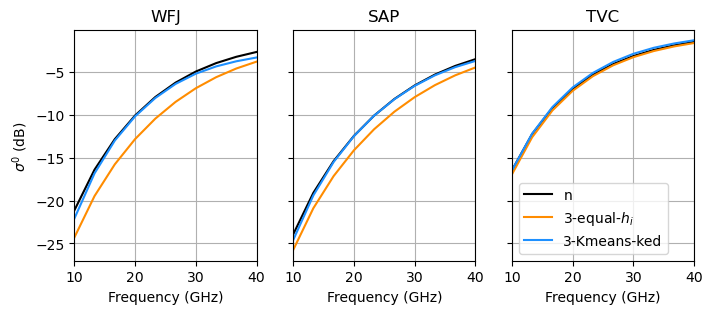

active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for the third component
active model is not yet fully implemented, need modification for 

In [24]:
fig, ax = plt.subplots(1,3,figsize = (8,3) , sharey = 'row', sharex = True)
ax[0].plot(f_array, mean_cdp_sig_n, label = 'n', color = 'black')
ax[0].plot(f_array, mean_cdp_sig_3, label = '3-equal', color = 'darkorange')
ax[0].plot(f_array, mean_cdp_sig_3k, label = '3-Kmeans', color = 'dodgerblue')

ax[1].plot(f_array, mean_sap_sig_n, label = 'n', color = 'black')
ax[1].plot(f_array, mean_sap_sig_3, label = '3', color = 'darkorange')
ax[1].plot(f_array, mean_sap_sig_3k, label = '3k', color = 'dodgerblue')

ax[2].plot(f_array, mean_tvc_sig_n, label = 'n', color = 'black')
ax[2].plot(f_array, mean_tvc_sig_3, label = '3-equal-$h_i$', color = 'darkorange')
ax[2].plot(f_array, mean_tvc_sig_3k, label = '3-Kmeans-ked', color = 'dodgerblue')
ax[2].legend()

ax[0].set_xlim(10,40)

ax[0].set_xlabel('Frequency (GHz)')
ax[1].set_xlabel('Frequency (GHz)')
ax[2].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('$\sigma^0$ (dB) ')
#ax[0].set_ylabel('RMSE (dB) ')

ax[0].set_title('WFJ')
ax[1].set_title('SAP')
ax[2].set_title('TVC')

ax[0].grid()
ax[1].grid()
ax[2].grid()


plt.subplots_adjust(hspace = 0.1)